# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

sns.set_theme(context='notebook', style='whitegrid')

tips = sns.load_dataset('tips').copy()

tips['net_bill'] = tips['total_bill'] - tips['tip']
tips = tips.loc[tips['net_bill'] > 0].copy()  
tips['tip_pct'] = tips['tip'] / tips['net_bill']

tips.head()


,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [2]:
reg1 = smf.ols('tip ~ net_bill', data=tips).fit()

print('--- Modelo 1: tip ~ net_bill ---')
print('Coeficientes (intercepto e inclinação):')
print(reg1.params)
print('\nR²:', reg1.rsquared)



--- Modelo 1: tip ~ net_bill ---
Coeficientes (intercepto e inclinação):
Intercept    1.330698
net_bill     0.099334
dtype: float64

R²: 0.3325407312323707


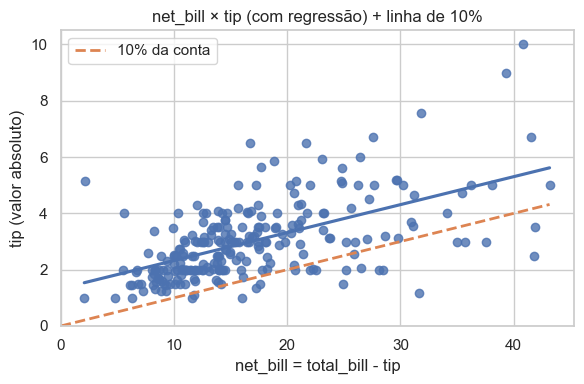

In [3]:
plt.figure(figsize=(6,4))

sns.regplot(data=tips, x='net_bill', y='tip', ci=None)

x_ref = np.linspace(0, tips['net_bill'].max(), 100)
plt.plot(x_ref, 0.1 * x_ref, '--', linewidth=2, label='10% da conta')

plt.xlim(0, None)
plt.ylim(0, None)

plt.title('net_bill × tip (com regressão) + linha de 10%')
plt.xlabel('net_bill = total_bill - tip')
plt.ylabel('tip (valor absoluto)')
plt.legend()
plt.tight_layout()
plt.show()


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [4]:
reg2 = smf.ols('tip_pct ~ net_bill', data=tips).fit()

print('--- Modelo 2: tip_pct ~ net_bill ---')
print('Coeficientes (intercepto e inclinação):')
print(reg2.params)
print('\nR²:', reg2.rsquared)



--- Modelo 2: tip_pct ~ net_bill ---
Coeficientes (intercepto e inclinação):
Intercept    0.305297
net_bill    -0.006146
dtype: float64

R²: 0.09129084920662944


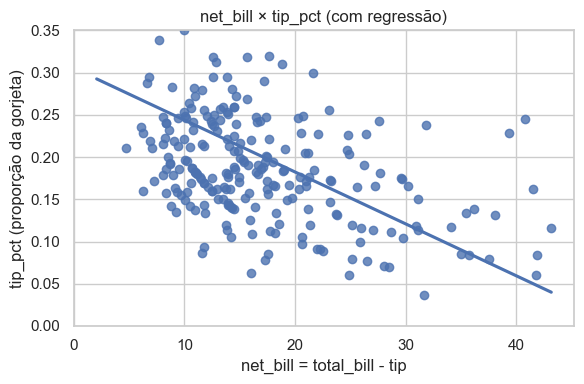

In [5]:
plt.figure(figsize=(6,4))
sns.regplot(data=tips, x='net_bill', y='tip_pct', ci=None)

plt.xlim(0, None)
plt.ylim(0, 0.35)

plt.title('net_bill × tip_pct (com regressão)')
plt.xlabel('net_bill = total_bill - tip')
plt.ylabel('tip_pct (proporção da gorjeta)')
plt.tight_layout()
plt.show()


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

No gráfico tip ~ net_bill, a relação é positiva: contas líquidas maiores tendem a gerar gorjetas maiores em valor absoluto. Já no tip_pct ~ net_bill, observa-se tendência negativa: à medida que a conta aumenta, o percentual de gorjeta tende a cair (o cliente dá mais dinheiro, mas proporcionalmente menos). Os pontos ficam mais espalhados conforme a conta cresce, sugerindo variância crescente no valor da gorjeta.
Por fim, não é adequado comparar diretamente os R² dos dois modelos, porque as variáveis resposta são diferentes (valor vs. proporção) e o R² depende da escala da resposta.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [6]:
pred_tip_pct = reg2.fittedvalues

pd.DataFrame({'net_bill': tips['net_bill'], 'tip_pct_pred': pred_tip_pct}).head()

print('Predições de tip_pct obtidas. Tamanho:', len(pred_tip_pct))


Predições de tip_pct obtidas. Tamanho: 244


In [7]:
tip_pred_via_pct = pred_tip_pct * tips['net_bill']

pd.DataFrame({
    'net_bill': tips['net_bill'],
    'tip_real': tips['tip'],
    'tip_pct_pred': pred_tip_pct,
    'tip_pred_via_pct': tip_pred_via_pct
}).head()

print('Predições em valor (tip_pred_via_pct) calculadas.')


Predições em valor (tip_pred_via_pct) calculadas.


In [8]:
tip_real = tips['tip']
sse = ((tip_real - tip_pred_via_pct) ** 2).sum()
sst = ((tip_real - tip_real.mean()) ** 2).sum()
r2_backtransform = 1 - sse/sst

print('R² (tip via transformação a partir de tip_pct ~ net_bill):', round(r2_backtransform, 4))


R² (tip via transformação a partir de tip_pct ~ net_bill): 0.1089


In [9]:
r2_direto = reg1.rsquared
print('R² (modelo direto tip ~ net_bill):', round(r2_direto, 4))
print('R² (tip via tip_pct*net_bill):    ', round(r2_backtransform, 4))

if r2_backtransform <= r2_direto:
    print('Observação: como esperado, a predição via mudança de escala tende a ter ajuste igual ou ligeiramente inferior ao modelo direto em tip.')
else:
    print('Observação: nesta amostra específica, a predição via mudança de escala ficou ligeiramente acima do modelo direto (caso não usual).')


R² (modelo direto tip ~ net_bill): 0.3325
R² (tip via tip_pct*net_bill):     0.1089
Observação: como esperado, a predição via mudança de escala tende a ter ajuste igual ou ligeiramente inferior ao modelo direto em tip.
